In [1]:
import os
import numpy as np
import pandas as pd

import IPython.display as ipd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

import torch
import torchaudio
import torchvision
import torchvision.transforms.functional as TF
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm

import scipy as sp
from skimage.io import imread, imshow, imsave
from skimage.filters import rank
from skimage.filters.rank import mean, median
from skimage.filters import gaussian
from skimage.morphology import rectangle, disk, remove_small_objects, remove_small_holes
from skimage.util import img_as_ubyte

from PIL import Image

In [2]:
output_images = "../output/unet/images/"

In [3]:
df = pd.read_csv('../output/unet/results/training_losses.csv')
df.head()

,epoch,train_loss,validation_loss,accuracy_train,f1_train,accuracy_val,f1_val
0,1,0.093882,0.043552,0.982442,0.956207,0.989813,0.976169
1,2,0.032439,0.317732,0.991449,0.979858,0.898729,0.806530
2,3,0.022072,0.014409,0.992806,0.983080,0.995467,0.989282
3,4,0.017013,0.011793,0.993953,0.985760,0.995891,0.990261
4,5,0.015992,0.011258,0.993964,0.985777,0.995947,0.990392


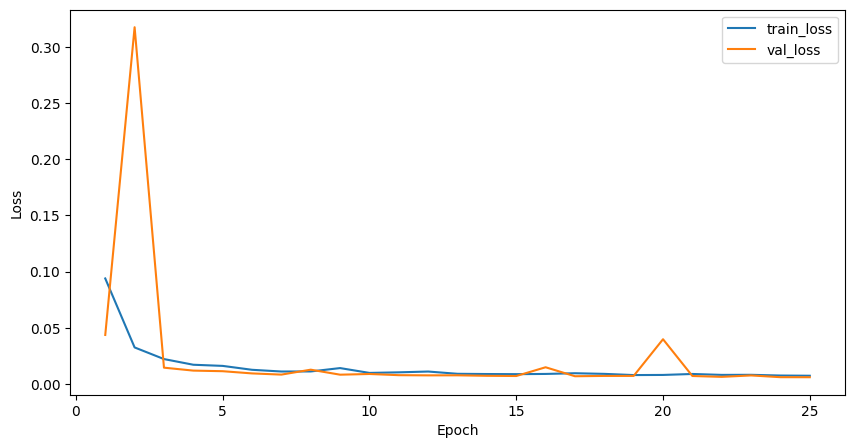

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train_loss'], label='train_loss')
plt.plot(df['epoch'], df['validation_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(output_images+"original_train_losses", dpi=300, bbox_inches='tight')
plt.show()

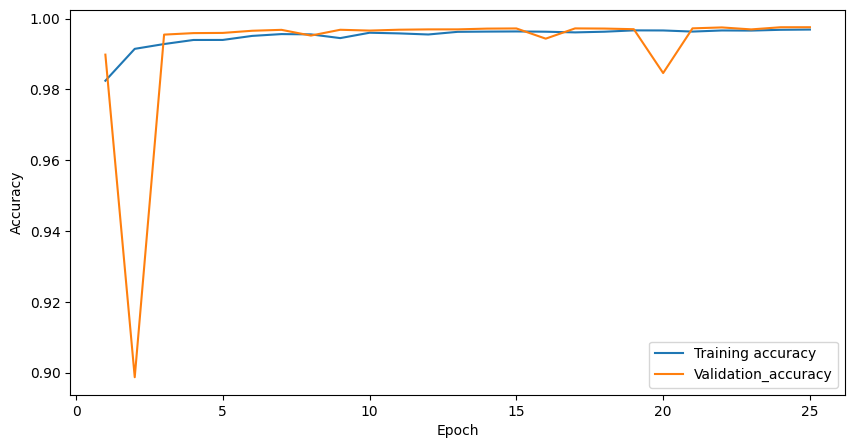

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['accuracy_train'], label='Training accuracy')
plt.plot(df['epoch'], df['accuracy_val'], label='Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(output_images+"original_training_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

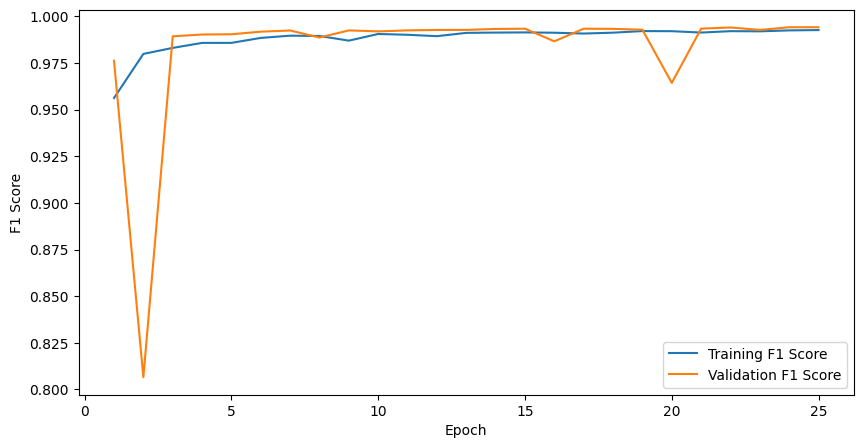

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['f1_train'], label='Training F1 Score')
plt.plot(df['epoch'], df['f1_val'], label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.savefig(output_images+"original_training_Dice.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df1 = df[df['epoch']  < 11]
df1.head()

,epoch,train_loss,validation_loss,accuracy_train,f1_train,accuracy_val,f1_val
0,1,0.093882,0.043552,0.982442,0.956207,0.989813,0.976169
1,2,0.032439,0.317732,0.991449,0.979858,0.898729,0.806530
2,3,0.022072,0.014409,0.992806,0.983080,0.995467,0.989282
3,4,0.017013,0.011793,0.993953,0.985760,0.995891,0.990261
4,5,0.015992,0.011258,0.993964,0.985777,0.995947,0.990392


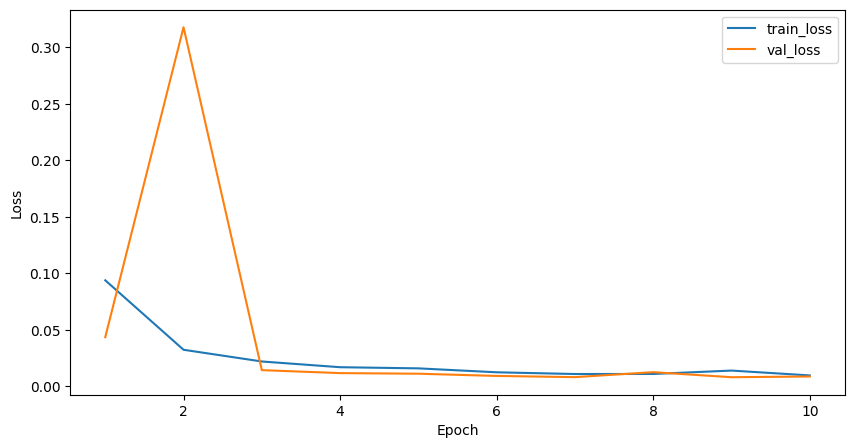

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['train_loss'], label='train_loss')
plt.plot(df1['epoch'], df1['validation_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(output_images+"original_train_losses_1", dpi=300, bbox_inches='tight')
plt.show()

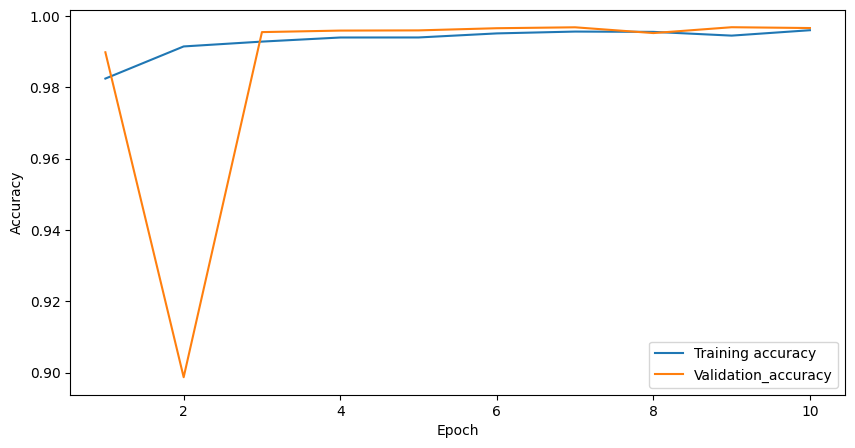

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['accuracy_train'], label='Training accuracy')
plt.plot(df1['epoch'], df1['accuracy_val'], label='Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(output_images+"original_training_accuracy_1.png", dpi=300, bbox_inches='tight')
plt.show()

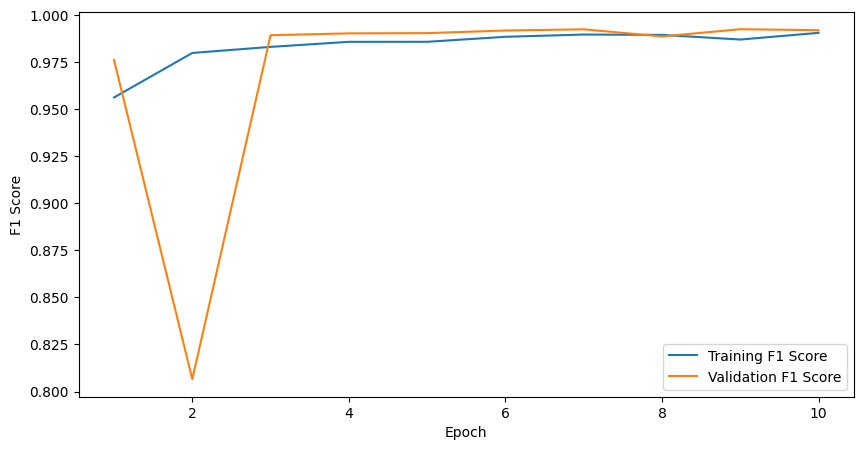

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['f1_train'], label='Training F1 Score')
plt.plot(df1['epoch'], df1['f1_val'], label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.savefig(output_images+"original_training_Dice_1.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
df3 = pd.read_csv('../output/unet/results/training_losses_3.csv')
df3.head()

,epoch,train_loss,validation_loss,accuracy_train,f1_train,accuracy_val,f1_val
0,1,0.345170,0.256333,0.976392,0.942694,0.980831,0.956265
1,2,0.189759,0.139230,0.989116,0.974340,0.992914,0.983260
2,3,0.110348,0.083055,0.991361,0.979643,0.993556,0.984795
3,4,0.067864,0.050816,0.992566,0.982491,0.994046,0.985921
4,5,0.044801,0.035249,0.993308,0.984209,0.994591,0.987203


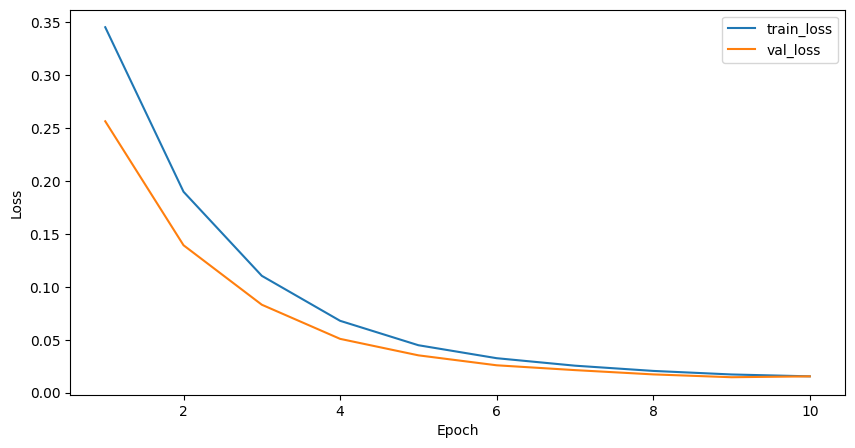

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df3['epoch'], df3['train_loss'], label='train_loss')
plt.plot(df3['epoch'], df3['validation_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(output_images+"original_train_losses_3", dpi=300, bbox_inches='tight')
plt.show()

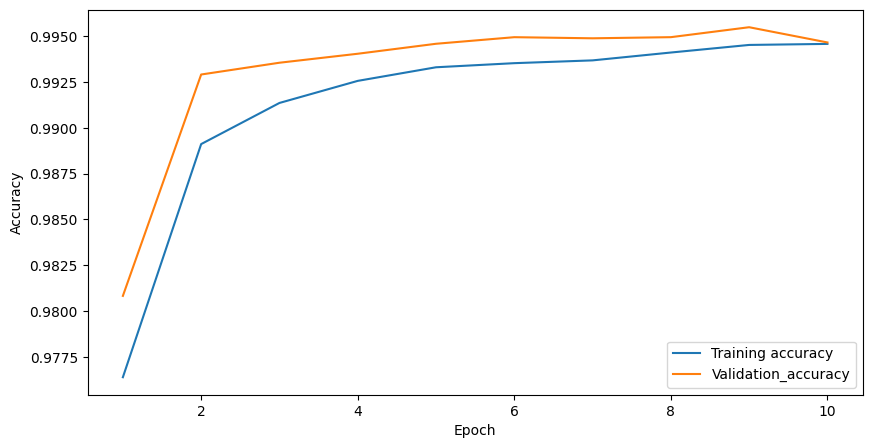

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df3['epoch'], df3['accuracy_train'], label='Training accuracy')
plt.plot(df3['epoch'], df3['accuracy_val'], label='Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(output_images+"original_training_accuracy_3.png", dpi=300, bbox_inches='tight')
plt.show()

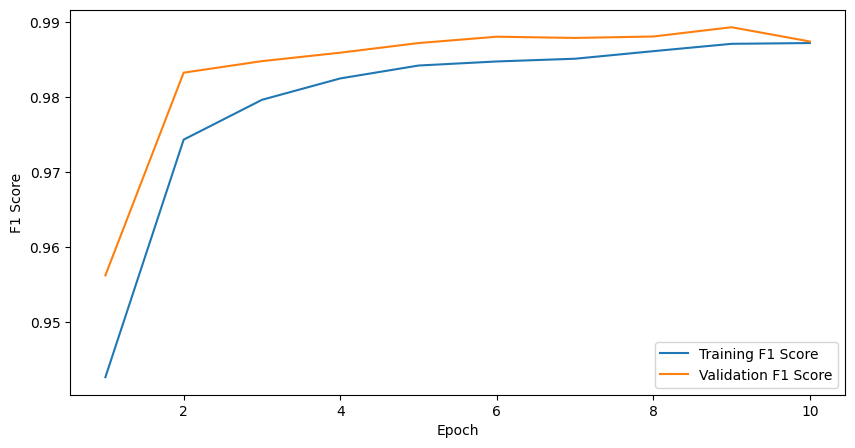

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df3['epoch'], df3['f1_train'], label='Training F1 Score')
plt.plot(df3['epoch'], df3['f1_val'], label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.savefig(output_images+"original_training_Dice_3.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
df2 = pd.read_csv('../output/unet/results/training_losses_2.csv')
df2.head()

,epoch,train_loss,validation_loss,accuracy_train,f1_train,accuracy_val,f1_val,dice_val
0,1,0.232146,0.134487,0.981163,0.955256,0.989819,0.976292,0.976292
1,2,0.096711,0.061900,0.990985,0.978818,0.993855,0.985455,0.985455
2,3,0.051222,0.036929,0.992433,0.982151,0.994686,0.987348,0.987348
3,4,0.033276,0.025481,0.993080,0.983718,0.994631,0.987233,0.987233
4,5,0.022582,0.016728,0.994362,0.986700,0.996067,0.990629,0.990629


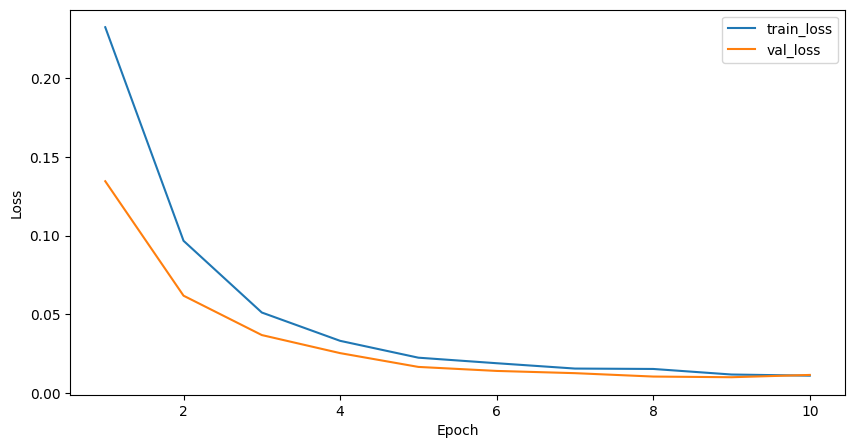

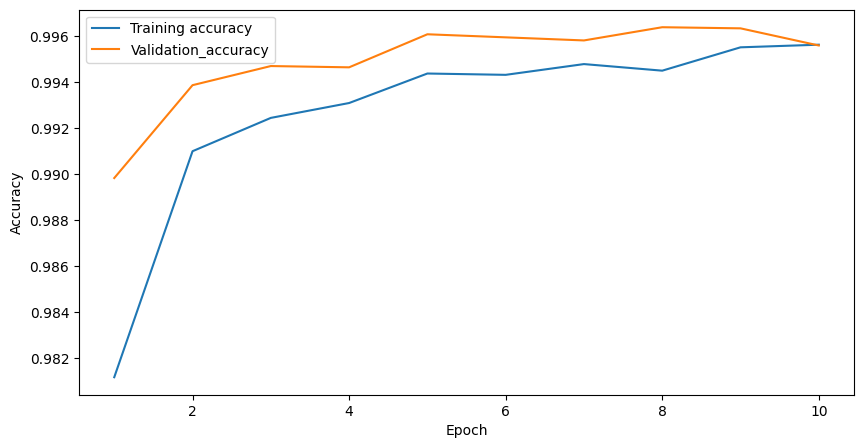

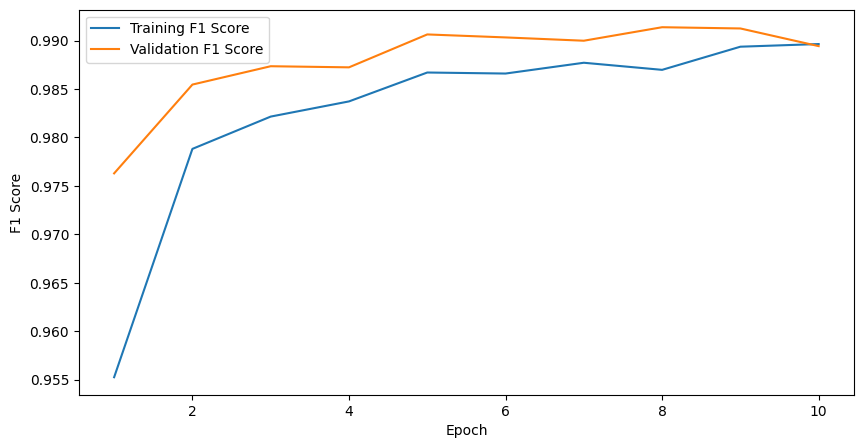

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df2['epoch'], df2['train_loss'], label='train_loss')
plt.plot(df2['epoch'], df2['validation_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(output_images+"original_train_losses_2", dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(df2['epoch'], df2['accuracy_train'], label='Training accuracy')
plt.plot(df2['epoch'], df2['accuracy_val'], label='Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(output_images+"original_training_accuracy_2.png", dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(df2['epoch'], df2['f1_train'], label='Training F1 Score')
plt.plot(df2['epoch'], df2['f1_val'], label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.savefig(output_images+"original_training_Dice_2.png", dpi=300, bbox_inches='tight')
plt.show()

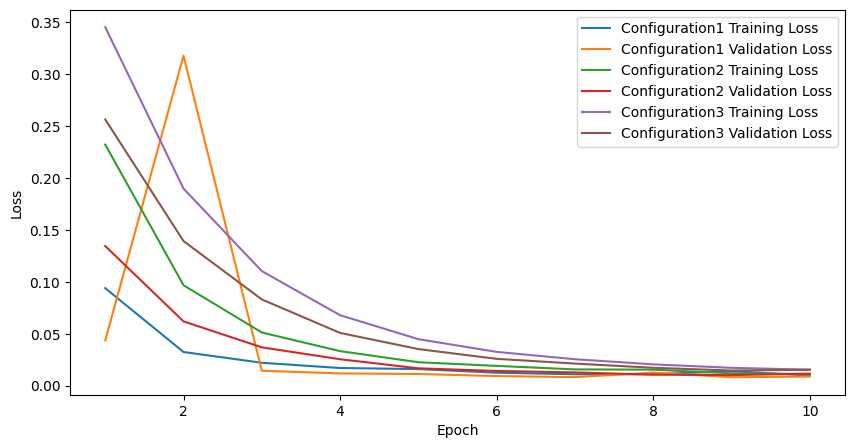

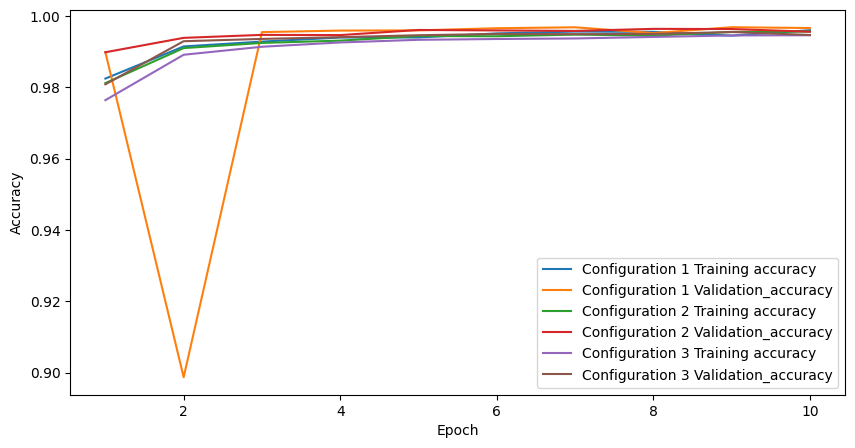

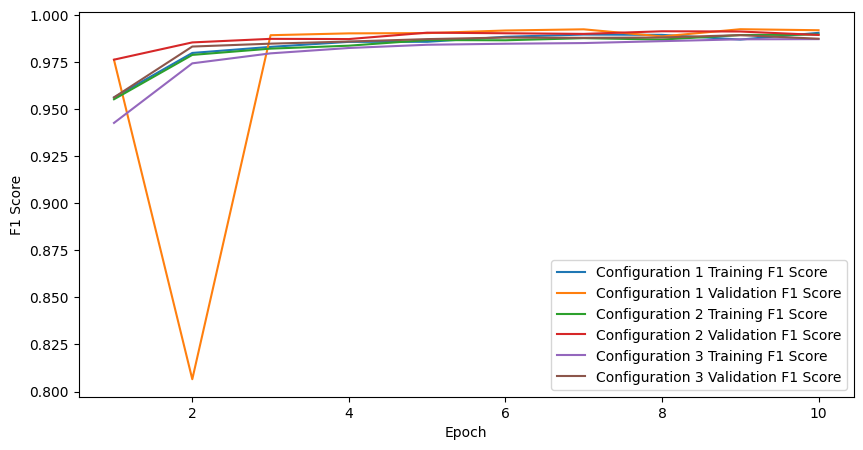

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['train_loss'], label='Configuration1 Training Loss')
plt.plot(df1['epoch'], df1['validation_loss'], label='Configuration1 Validation Loss')
plt.plot(df2['epoch'], df2['train_loss'], label='Configuration2 Training Loss')
plt.plot(df2['epoch'], df2['validation_loss'], label='Configuration2 Validation Loss')
plt.plot(df3['epoch'], df3['train_loss'], label='Configuration3 Training Loss')
plt.plot(df3['epoch'], df3['validation_loss'], label='Configuration3 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(output_images+"comparison_loss", dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['accuracy_train'], label='Configuration 1 Training accuracy')
plt.plot(df1['epoch'], df1['accuracy_val'], label='Configuration 1 Validation_accuracy')
plt.plot(df2['epoch'], df2['accuracy_train'], label='Configuration 2 Training accuracy')
plt.plot(df2['epoch'], df2['accuracy_val'], label='Configuration 2 Validation_accuracy')
plt.plot(df3['epoch'], df3['accuracy_train'], label='Configuration 3 Training accuracy')
plt.plot(df3['epoch'], df3['accuracy_val'], label='Configuration 3 Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(output_images+"comparison_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(df1['epoch'], df1['f1_train'], label='Configuration 1 Training F1 Score')
plt.plot(df1['epoch'], df1['f1_val'], label='Configuration 1 Validation F1 Score')
plt.plot(df2['epoch'], df2['f1_train'], label='Configuration 2 Training F1 Score')
plt.plot(df2['epoch'], df2['f1_val'], label='Configuration 2 Validation F1 Score')
plt.plot(df3['epoch'], df3['f1_train'], label='Configuration 3 Training F1 Score')
plt.plot(df3['epoch'], df3['f1_val'], label='Configuration 3 Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.savefig(output_images+"comparison_Dice.png", dpi=300, bbox_inches='tight')
plt.show()

Evaluation

In [18]:
eval = pd.read_csv('../output/unet/results/evaluation.csv')
eval1 = pd.read_csv('../output/unet/results/evaluation_1.csv')
eval2 = pd.read_csv('../output/unet/results/evaluation_2.csv')
eval3 = pd.read_csv('../output/unet/results/evaluation_3.csv')

In [19]:
eval.head()

,accuracy,f1,precision,recall,roc_auc,roc_curve_fpr,roc_curve_tpr
0,0.997174,0.993876,0.994114,0.993637,0.995936,[0. 0.00176457 1. ],[0. 0.99363731 1. ]
1,0.997700,0.993194,0.992969,0.993419,0.995995,[0. 0.00142963 1. ],[0. 0.99341877 1. ]
2,0.997261,0.994432,0.994231,0.994633,0.996375,[0. 0.00188216 1. ],[0. 0.99463276 1. ]
3,0.996895,0.993084,0.992401,0.993769,0.995784,[0. 0.00220123 1. ],[0. 0.99376854 1. ]
4,0.997308,0.994563,0.994020,0.995106,0.996569,[0. 0.00196807 1. ],[0. 0.99510581 1. ]


In [20]:
acc = eval['accuracy'].mean()
f1 = eval['f1'].mean()
acc_1 = eval1['accuracy'].mean()
f1_1 = eval1['f1'].mean()
acc_2 = eval2['accuracy'].mean()
f1_2 = eval2['f1'].mean()
acc_3 = eval3['accuracy'].mean()
f1_3 = eval3['f1'].mean()

config = [ 'Configuration 1', 'Configuration 2', 'Configuration 3']

In [21]:
testing_df = pd.DataFrame({'config':config,'accuracy': [ acc_1, acc_2, acc_3], 'f1': [f1_1, f1_2, f1_3]})
testing_df.to_csv('../output/unet/results/testing.csv', index=False)

In [22]:
testing_df.head()

,config,accuracy,f1
0,Configuration 1,0.996740,0.992360
1,Configuration 2,0.996259,0.991213
2,Configuration 3,0.995301,0.989014
